### I have problem with ANN when doing run to the fit
### (Your session crashed after using all available RAM)

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [7]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [8]:
df = pd.read_csv('Bus_Breakdown_and_Delays.csv')

In [9]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5.0,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3.0,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12.0,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11.0,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12.0,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [10]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
135022,2016-2017,1356808,Special Ed PM Run,1502,L026,Heavy Traffic,17862,06/09/2017 02:36:00 PM,06/09/2017 02:39:00 PM,Brooklyn,...,15 Min,0.0,Yes,Yes,Yes,06/09/2017 02:39:00 PM,NaN,06/09/2017 02:39:03 PM,Running Late,School-Age
135023,2016-2017,1356809,Special Ed PM Run,GC0097,P723,Flat Tire,26094,06/09/2017 02:15:00 PM,06/09/2017 02:40:00 PM,Bronx,...,30-40 min,0.0,Yes,No,Yes,06/09/2017 02:40:00 PM,90331465,06/09/2017 03:54:29 PM,Running Late,School-Age
135024,2016-2017,1356810,Pre-K/EI,52125,B1107Z,Heavy Traffic,C598,06/09/2017 02:36:00 PM,06/09/2017 02:41:00 PM,Brooklyn,...,30 MINS,0.0,Yes,Yes,Yes,06/09/2017 02:41:00 PM,NaN,06/09/2017 05:00:44 PM,Running Late,Pre-K
135025,2016-2017,1356811,Special Ed PM Run,1300,M644,Heavy Traffic,"02566, 02139, 02872",06/09/2017 01:40:00 PM,06/09/2017 02:42:00 PM,Manhattan,...,15-20 min,0.0,Yes,No,No,06/09/2017 02:42:00 PM,NaN,06/09/2017 02:42:03 PM,Running Late,School-Age
135026,2016-2017,1356812,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135027 entries, 0 to 135026
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   School_Year                      135027 non-null  object 
 1   Busbreakdown_ID                  135027 non-null  int64  
 2   Run_Type                         134946 non-null  object 
 3   Bus_No                           135026 non-null  object 
 4   Route_Number                     134941 non-null  object 
 5   Reason                           134934 non-null  object 
 6   Schools_Serviced                 135026 non-null  object 
 7   Occurred_On                      135026 non-null  object 
 8   Created_On                       135026 non-null  object 
 9   Boro                             129250 non-null  object 
 10  Bus_Company_Name                 135026 non-null  object 
 11  How_Long_Delayed                 115322 non-null  object 
 12  Nu

In [12]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.350270e+05,135026.000000
mean,1.285006e+06,3.599388
std,4.146678e+04,56.401224
min,1.212691e+06,0.000000
25%,1.249444e+06,0.000000
50%,1.285235e+06,0.000000
75%,1.320784e+06,4.000000
max,1.361694e+06,9007.000000


In [13]:
numerical_features = df.select_dtypes(include=['int64','int64']).columns

In [14]:
categorical_features = df.select_dtypes(include=['object']).columns

In [15]:

df.duplicated().sum()

0

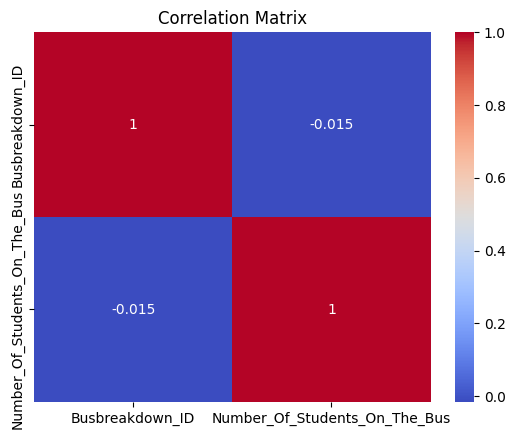

In [16]:
# Correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr() # Select numerical columns only
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"Outliers for {feature}:\n{outliers}")

Outliers for Busbreakdown_ID:
Empty DataFrame
Columns: [School_Year, Busbreakdown_ID, Run_Type, Bus_No, Route_Number, Reason, Schools_Serviced, Occurred_On, Created_On, Boro, Bus_Company_Name, How_Long_Delayed, Number_Of_Students_On_The_Bus, Has_Contractor_Notified_Schools, Has_Contractor_Notified_Parents, Have_You_Alerted_OPT, Informed_On, Incident_Number, Last_Updated_On, Breakdown_or_Running_Late, School_Age_or_PreK]
Index: []

[0 rows x 21 columns]


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [18]:
# Here about Drop columns
columns_to_drop = ['Busbreakdown_ID', 'Last_Updated_On', 'Incident_Number']
df.drop(columns=columns_to_drop, inplace=True)


In [19]:
df.isnull().sum()

,0
School_Year,0
Run_Type,81
Bus_No,1
Route_Number,86
Reason,93
Schools_Serviced,1
Occurred_On,1
Created_On,1
Boro,5777
Bus_Company_Name,1


In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

,0
School_Year,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0
Bus_Company_Name,0


In [22]:
print(df.columns)

Index(['School_Year', 'Run_Type', 'Bus_No', 'Route_Number', 'Reason',
       'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Breakdown_or_Running_Late',
       'School_Age_or_PreK'],
      dtype='object')


In [23]:
one_hot_features = [
    'Run_Type', 'Route_Number', 'Reason', 'Schools_Serviced',
    'Boro', 'Bus_Company_Name', 'Has_Contractor_Notified_Schools',
    'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT',
]

In [24]:
df = pd.get_dummies(df, columns=one_hot_features, drop_first=True)

In [25]:
label_encoder = LabelEncoder()
df['School_Year'] = label_encoder.fit_transform(df['School_Year'])
df['Occurred_On'] = label_encoder.fit_transform(df['Occurred_On'])
df['Created_On'] = label_encoder.fit_transform(df['Created_On'])
df['Breakdown_or_Running_Late'] = label_encoder.fit_transform(df['Breakdown_or_Running_Late'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110008 entries, 0 to 135025
Columns: 14677 entries, School_Year to Have_You_Alerted_OPT_Yes
dtypes: bool(14668), float64(1), int64(4), object(4)
memory usage: 1.5+ GB


In [27]:
numerical_features = df.select_dtypes(include=['number']).columns
numerical_features = [col for col in numerical_features if col not in one_hot_features]
scalerS = StandardScaler()
df[numerical_features] = scalerS.fit_transform(df[numerical_features])
scalerS

StandardScaler()

In [28]:
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
scaler

MinMaxScaler()

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [29]:
X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

In [30]:
# Here is split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Testing set: {X_test.shape}, {y_test.shape}')


Training set: (88006, 14676), (88006,)
Testing set: (22002, 14676), (22002,)


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [32]:
for col in X_train.columns:
    if X_train[col].dtype == 'datetime64[ns]':
        X_train[col] = (X_train[col] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')  # Convert to Unix timestamp (seconds since epoch)

if y_train.dtype == 'datetime64[ns]':
    y_train = (y_train - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')

In [33]:
model = Sequential()

# Here is input layer
model.add(Input(shape=(X_train.shape[1],)))

# Here is first hidden layer
model.add(Dense(units=20, activation='relu'))

# Here is second hidden layer
model.add(Dense(units=20, activation='relu'))

# Here is the output layer
model.add(Dense(units=1, activation='sigmoid'))  # Use 'softmax' for multi-class classification


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [ ]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# If necessary, do the same for y_train
y_train = y_train.apply(pd.to_numeric, errors='coerce')

# Fill any missing values (NaN) resulting from the conversion
X_train.fillna(0, inplace=True)  # Or use a different fill strategy
y_train.fillna(0, inplace=True)  # If applicable

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

## Make Predictions
Use the trained model to make predictions on new or unseen data.

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

## Save the Model
Save the trained model for submission.

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

About the Data Preprocessing we choose Normalization: To get the image pixel values within the range of 0 to 1, we employed normalization. This guarantees that the model handles every feature similarly and aids in hastening the convergence of the model during training1.
Encoding: Since we are working with image data, the input features don't require encoding. On the other hand, one-hot encoding would be utilized to transform categorical labels into a format appropriate for training.

